In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumGothic')


In [ ]:
data = pd.read_csv('budo_labeling_완.csv', index_col = 0)
data

,index,회사명,거래소코드,회계년도,[제조]총자본순이익률,[제조]총자본영업이익률,[제조]자기자본순이익률,[제조]매출액총이익률,[제조]매출액영업이익률,[제조]금융비용부담률,...,[제조] 이자비용(천원),[제조]자본(*)(천원),[제조] 비유동자산(*)(천원),[제조] 현금 및 현금성자산(*)(천원),[제조] 유동부채(*)(천원),[제조]영업활동으로 인한 현금흐름(*)(천원),[제조]매출액(영업수익)(*)(천원),[제조] 당기순이익(손실)(천원),상장폐지일,부도여부
0,13920,동화약품(주),20,2006,3.95,8.06,4.99,48.36,10.24,-0.62,...,0.0,155725978.0,62083281.0,12195978.0,24505360.0,26246911.0,152821587.0,0.0,NaN,0.0
1,13917,동화약품(주),20,2007,4.13,7.26,5.09,48.87,9.53,-1.49,...,0.0,160998236.0,65095476.0,9428619.0,26052899.0,23185889.0,148738623.0,0.0,NaN,0.0
2,13918,동화약품(주),20,2008,10.28,16.04,12.64,55.66,19.16,-2.06,...,0.0,179141892.0,84053277.0,4677396.0,32920471.0,23655312.0,175119773.0,21495381.0,NaN,0.0
3,13919,동화약품(주),20,2009,10.72,15.03,14.83,55.77,21.19,-1.75,...,0.0,205363087.0,183993477.0,10967304.0,80426807.0,31155090.0,188607515.0,28518530.0,NaN,0.0
4,13913,동화약품(주),20,2010,1.68,3.18,2.54,43.57,4.79,0.68,...,0.0,213915026.0,202168003.0,18140995.0,82657565.0,18587828.0,215279424.0,5427207.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,6136,(주)엑세스바이오인코퍼레이션,950130,2014,5.50,6.45,6.45,47.82,12.58,-0.72,...,0.0,57093892.0,22775157.0,2277486.0,7884320.0,-1112479.0,32387575.0,3624609.0,NaN,0.0
19992,6132,(주)엑세스바이오인코퍼레이션,950130,2015,3.31,2.91,3.70,30.81,5.58,-0.48,...,0.0,61665064.0,33716662.0,2571609.0,1928812.0,5762413.0,34758550.0,2276717.0,NaN,0.0
19993,6135,(주)엑세스바이오인코퍼레이션,950130,2016,1.60,1.97,2.08,41.58,5.36,0.00,...,0.0,63152029.0,50080698.0,22694029.0,2419545.0,6556892.0,29762933.0,1352476.0,NaN,0.0
19994,17526,잉글우드랩(주),950140,2015,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,25980689.0,25579784.0,1137.0,476282.0,-2379.0,0.0,400905.0,NaN,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19996 entries, 0 to 19995
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           19996 non-null  int64  
 1   회사명                             19996 non-null  object 
 2   거래소코드                           19996 non-null  int64  
 3   회계년도                            19996 non-null  int64  
 4   [제조]총자본순이익률                     19495 non-null  float64
 5   [제조]총자본영업이익률                    19495 non-null  float64
 6   [제조]자기자본순이익률                    19495 non-null  float64
 7   [제조]매출액총이익률                     19495 non-null  float64
 8   [제조]매출액영업이익률                    19495 non-null  float64
 9   [제조]금융비용부담률                     19495 non-null  float64
 10  [제조]자기자본배율                      19495 non-null  float64
 11  [제조]부채비율                        19495 non-null  float64
 12  [제조]유동비율                        

In [ ]:
data.거래소코드 = data.거래소코드.map('{:06d}'.format)
len(data.거래소코드.unique())

2212

In [ ]:
data.부도여부.value_counts()

0.0    19802
1.0      194
Name: 부도여부, dtype: int64

In [ ]:
print(len(data[data['부도여부']==0].거래소코드.unique()))
print(len(data[data['부도여부']==1].거래소코드.unique()))


2208
189


## 결측치 처리

In [ ]:
# 결측치 확인
data.isnull().sum()

index                                 0
회사명                                   0
거래소코드                                 0
회계년도                                  0
[제조]총자본순이익률                         501
[제조]총자본영업이익률                        501
[제조]자기자본순이익률                        501
[제조]매출액총이익률                         501
[제조]매출액영업이익률                        501
[제조]금융비용부담률                         501
[제조]자기자본배율                          501
[제조]부채비율                            501
[제조]유동비율                            501
[제조]당좌비율                            501
[제조]차입금의존도                          501
[제조]비유동장기적합률                        501
[제조]총자본회전률                          501
[제조]자기자본회전률                         501
[제조]운전자본회전률                         501
[제조]매출채권회전률                         501
[제조]재고자산회전률                         501
[제조]매입채무회전률                         501
[제조]총자본증가율                          501
[제조]유동자산증가율                         501
[제조]매출액증가율                          501


In [ ]:
# 결측치 제거
data.drop(['상장폐지일'], axis = 1, inplace = True)
data.dropna(inplace =True)
data.isnull().sum()

index                             0
회사명                               0
거래소코드                             0
회계년도                              0
[제조]총자본순이익률                       0
[제조]총자본영업이익률                      0
[제조]자기자본순이익률                      0
[제조]매출액총이익률                       0
[제조]매출액영업이익률                      0
[제조]금융비용부담률                       0
[제조]자기자본배율                        0
[제조]부채비율                          0
[제조]유동비율                          0
[제조]당좌비율                          0
[제조]차입금의존도                        0
[제조]비유동장기적합률                      0
[제조]총자본회전률                        0
[제조]자기자본회전률                       0
[제조]운전자본회전률                       0
[제조]매출채권회전률                       0
[제조]재고자산회전률                       0
[제조]매입채무회전률                       0
[제조]총자본증가율                        0
[제조]유동자산증가율                       0
[제조]매출액증가율                        0
[제조]순이익증가율                        0
[제조]자기자본증가율                       0
[제조]CASH FLOW 대 부채비율        

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19441 entries, 0 to 19995
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           19441 non-null  int64  
 1   회사명                             19441 non-null  object 
 2   거래소코드                           19441 non-null  object 
 3   회계년도                            19441 non-null  int64  
 4   [제조]총자본순이익률                     19441 non-null  float64
 5   [제조]총자본영업이익률                    19441 non-null  float64
 6   [제조]자기자본순이익률                    19441 non-null  float64
 7   [제조]매출액총이익률                     19441 non-null  float64
 8   [제조]매출액영업이익률                    19441 non-null  float64
 9   [제조]금융비용부담률                     19441 non-null  float64
 10  [제조]자기자본배율                      19441 non-null  float64
 11  [제조]부채비율                        19441 non-null  float64
 12  [제조]유동비율                        

In [ ]:
data.부도여부.value_counts()

0.0    19248
1.0      193
Name: 부도여부, dtype: int64

## 변수 분포 파악

In [ ]:
col_num = data.select_dtypes(include= ['int64', 'float64']).columns.tolist()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


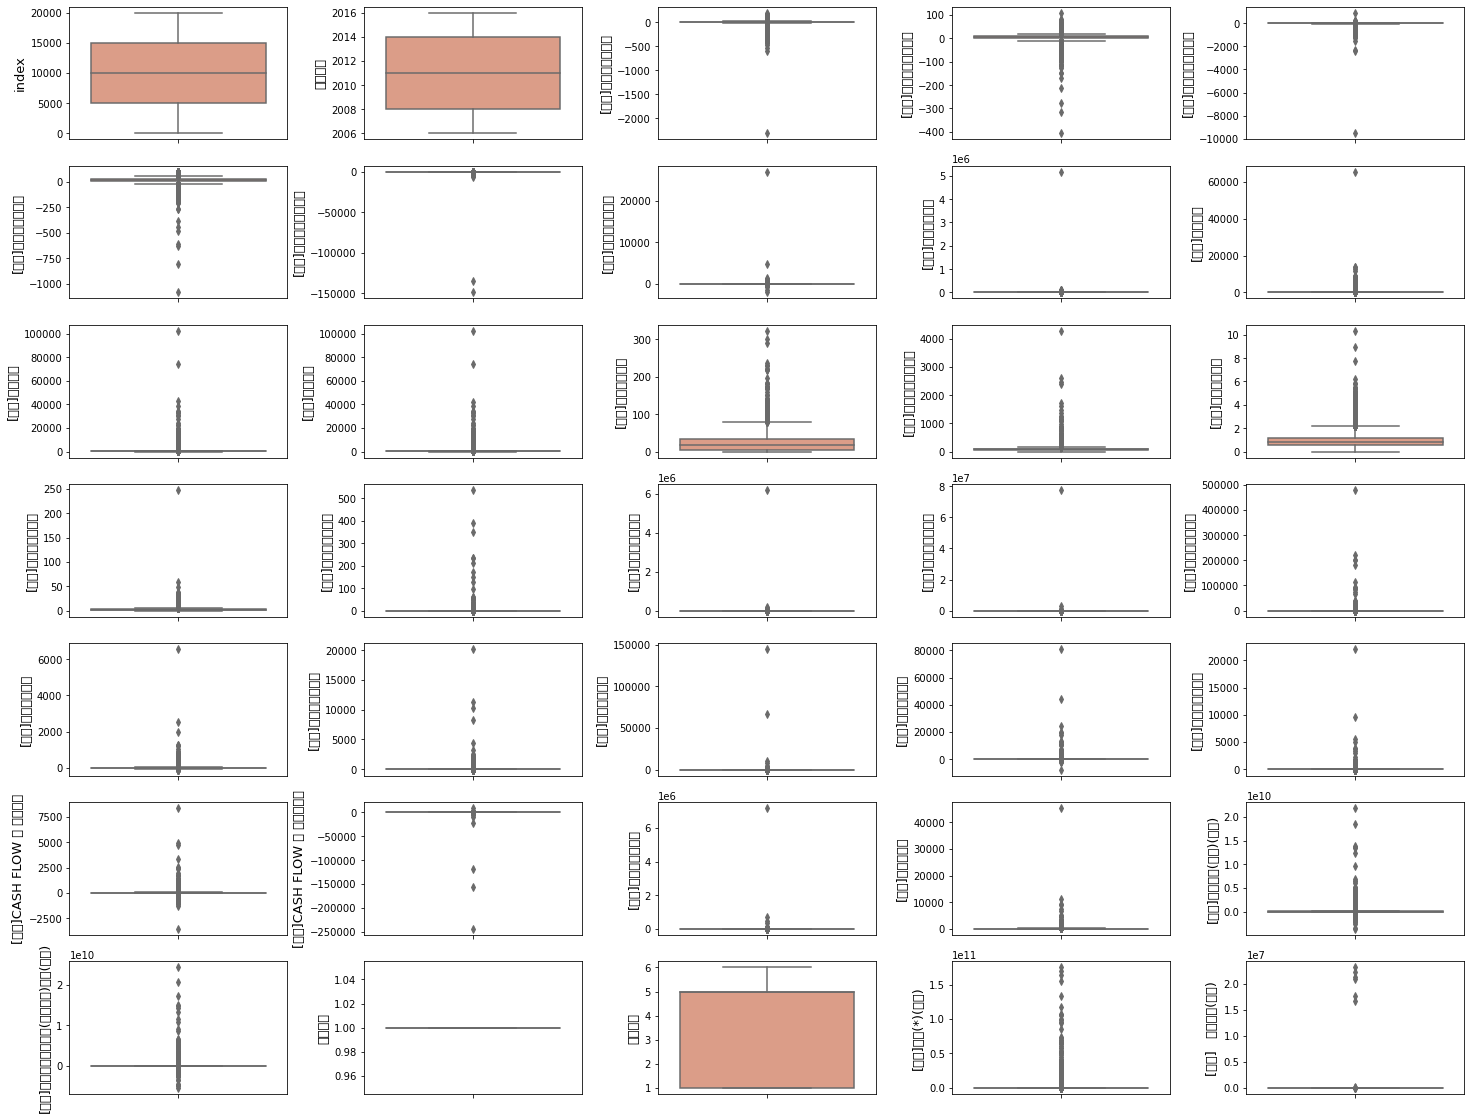

In [ ]:
fig, axs = plt.subplots(7,5,figsize=(25,20))
for col, ax in zip(col_num, axs.flatten()):
    b = sns.boxplot(y=data[col], ax = ax, color = 'darksalmon')
    b.set_ylabel(col, fontsize = 13)
    plt.subplots_adjust(wspace=.35)

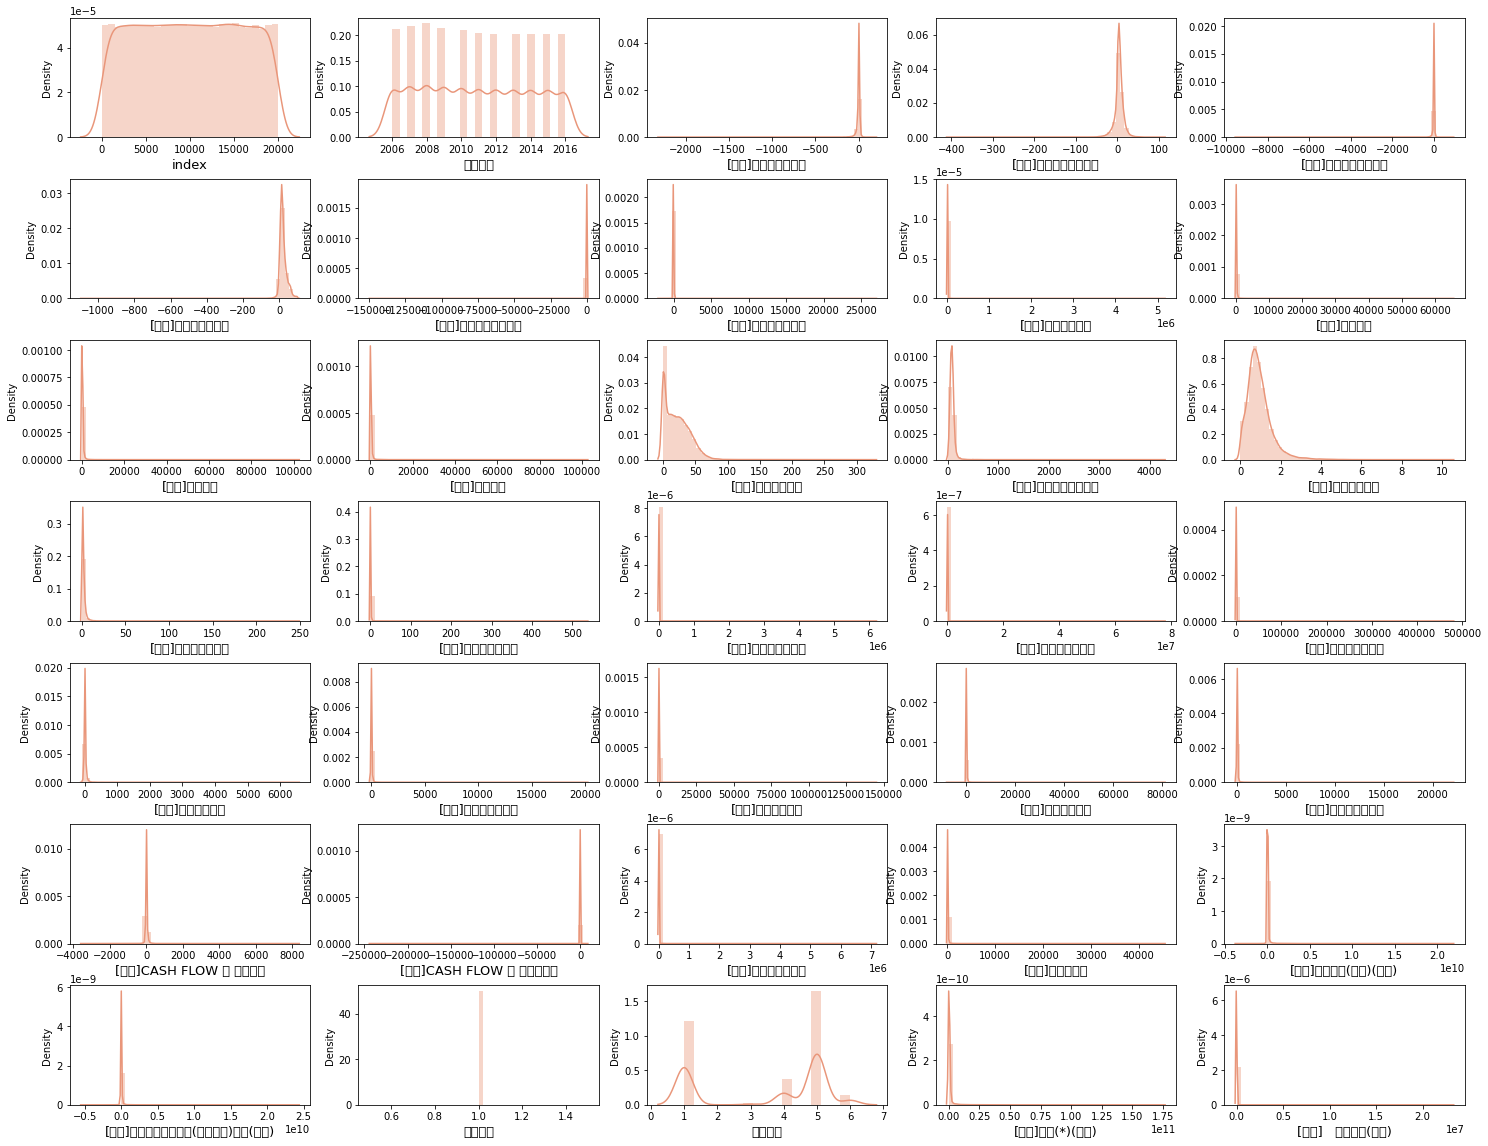

In [ ]:
fig, axs = plt.subplots(7,5, figsize = (25, 20))
for col, ax in zip(col_num, axs.flatten()):
    b = sns.distplot(x = data[col], ax = ax, color = 'darksalmon')
    b.set_xlabel(col, fontsize = 13)
    plt.subplots_adjust(hspace = .35)

## 파생변수 생성

In [ ]:
data.rename(columns = {'[제조]자기자본배율' : '[제조]자기자본비율'}, inplace = True)

data['총자산순이익률'] = data['[제조]   당기순이익(손실)(천원)']/data['[제조]자산(*)(천원)']
data['총자산영업이익률'] = data['[제조]영업이익(손실)(천원)']/data['[제조]자산(*)(천원)']
data['영업이익이자보상비율'] = data['[제조]영업이익(손실)(천원)']/data['[제조]   이자비용(천원)']
data['고정비율'] = data['[제조]   비유동자산(*)(천원)']/(data['[제조]자본(*)(천원)']+data['[제조]   유동부채(*)(천원)'])
data['현금비율'] = data['[제조]         현금 및 현금성자산(*)(천원)']/data['[제조]   유동부채(*)(천원)']
data['ocf 대 유동부채'] = data['[제조]영업활동으로 인한 현금흐름(*)(천원)']/data['[제조]   유동부채(*)(천원)']

# 회전율 및 증가율 변수(차분데이터)
data['전기자산'] = data.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['[제조]자산(*)(천원)'].shift(1)
data.fillna(0, inplace=True) # 상장일이 2006년 이후인 경우 전기 자산이 없으므로 0으로 결측치 대체
data['전당평균자산'] = (data['전기자산']+data['[제조]자산(*)(천원)'])/2
data['총자산회전율'] = data['[제조]매출액(영업수익)(*)(천원)']/data['전당평균자산']

data['총자산증가율'] = (data['[제조]자산(*)(천원)']/data['전기자산'])-1
data['총자산증가율'].replace([np.inf, -np.inf], 0, inplace=True) # 상장일이 2006년 이후인 경우 전기 자산이 없으므로 0으로 inf/-inf 대체
data.drop(['전기자산', '전당평균자산'], axis=1, inplace=True)

In [ ]:
# 2006년도 데이터 삭제
idx = data[data['회계년도']==2006].index
data.drop(index = idx, inplace = True)
data.shape

(17644, 54)

In [ ]:
# 중복데이터 제거
a = data.groupby(['거래소코드', '회계년도'])['[제조]자기자본비율'].count().reset_index()
data.drop_duplicates(['거래소코드', '회계년도'], keep = 'last', inplace = True)
data.shape

(17601, 54)

## 이상치 처리

In [ ]:
# (주)리드코프 발견, 금융기업이므로 삭제
idx = data[data['거래소코드']=='012700'].index
data.drop(idx, inplace=True)

<AxesSubplot:xlabel='[제조]   이자비용(천원)'>

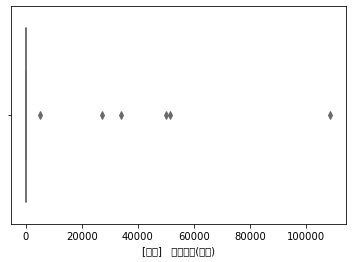

In [ ]:
sns.boxplot(x=data['[제조]   이자비용(천원)'],color='darksalmon')

In [ ]:
data.영업이익이자보상비율[data.영업이익이자보상비율.isin([np.inf, -np.inf])==False].describe()


count      6.000000
mean    -107.587491
std      190.464537
min     -476.837144
25%     -111.076550
50%      -44.847835
75%        0.403244
max       38.673720
Name: 영업이익이자보상비율, dtype: float64

In [ ]:
# 영업이익이자보상비율 삭제
data.drop(['[제조]   이자비용(천원)', '영업이익이자보상비율'], axis=1, inplace=True)
data.shape

(17591, 52)

## 상관관계 파악

,회계년도,[제조]총자본순이익률,[제조]총자본영업이익률,[제조]자기자본순이익률,[제조]매출액총이익률,[제조]매출액영업이익률,[제조]금융비용부담률,[제조]자기자본비율,[제조]부채비율,[제조]유동비율,...,[제조]매출액(영업수익)(*)(천원),[제조] 당기순이익(손실)(천원),부도여부,총자산순이익률,총자산영업이익률,고정비율,현금비율,ocf 대 유동부채,총자산회전율,총자산증가율
회계년도,1.000000,0.076391,-0.009884,0.043073,0.001261,-0.005795,0.001182,0.015998,-0.023599,0.029963,...,0.022376,0.009057,-0.044604,0.074002,0.009440,0.016268,0.034163,0.024989,-0.108188,-0.084844
[제조]총자본순이익률,0.076391,1.000000,0.680778,0.339469,0.198971,0.021582,-0.020829,0.006801,-0.086327,0.025354,...,0.029244,0.072718,-0.252495,0.744555,0.390309,0.005374,0.015625,0.102177,0.166636,0.108212
[제조]총자본영업이익률,-0.009884,0.680778,1.000000,0.321713,0.337271,0.034781,-0.020410,0.004582,-0.103423,0.007315,...,0.029595,0.075635,-0.223474,0.568419,0.637697,-0.093827,-0.002265,0.164356,0.303205,0.146887
[제조]자기자본순이익률,0.043073,0.339469,0.321713,1.000000,0.118774,0.011205,-0.016509,0.004190,-0.179311,0.014439,...,0.016432,0.047488,-0.114384,0.234656,0.149808,-0.076424,0.010290,0.049615,0.116160,0.055494
[제조]매출액총이익률,0.001261,0.198971,0.337271,0.118774,1.000000,0.008321,0.007807,-0.003048,-0.076751,0.041293,...,-0.030257,0.035783,-0.081762,0.165015,0.180042,-0.043714,-0.001915,0.071970,-0.073967,0.078228
[제조]매출액영업이익률,-0.005795,0.021582,0.034781,0.011205,0.008321,1.000000,-0.601003,0.000100,-0.001236,0.002336,...,0.002610,0.003180,-0.005775,0.021058,0.024418,-0.009458,0.000851,0.009279,0.021108,-0.001382
[제조]금융비용부담률,0.001182,-0.020829,-0.020410,-0.016509,0.007807,-0.601003,1.000000,-0.000708,0.006033,-0.016819,...,-0.002147,-0.002462,0.014023,-0.015694,-0.009881,0.024402,-0.014623,-0.008600,-0.016623,0.006700
[제조]자기자본비율,0.015998,0.006801,0.004582,0.004190,-0.003048,0.000100,-0.000708,1.000000,-0.004342,0.000243,...,0.009031,0.011751,-0.003669,0.005747,0.002846,0.010867,0.000592,0.002071,-0.013253,0.000189
[제조]부채비율,-0.023599,-0.086327,-0.103423,-0.179311,-0.076751,-0.001236,0.006033,-0.004342,1.000000,-0.030091,...,0.007399,-0.030817,0.112173,-0.064721,-0.055927,0.060414,-0.024336,-0.018632,0.015134,-0.019125
[제조]유동비율,0.029963,0.025354,0.007315,0.014439,0.041293,0.002336,-0.016819,0.000243,-0.030091,1.000000,...,-0.020673,-0.004211,-0.014129,0.022886,0.007073,-0.034033,0.785916,0.648191,-0.103976,0.024155


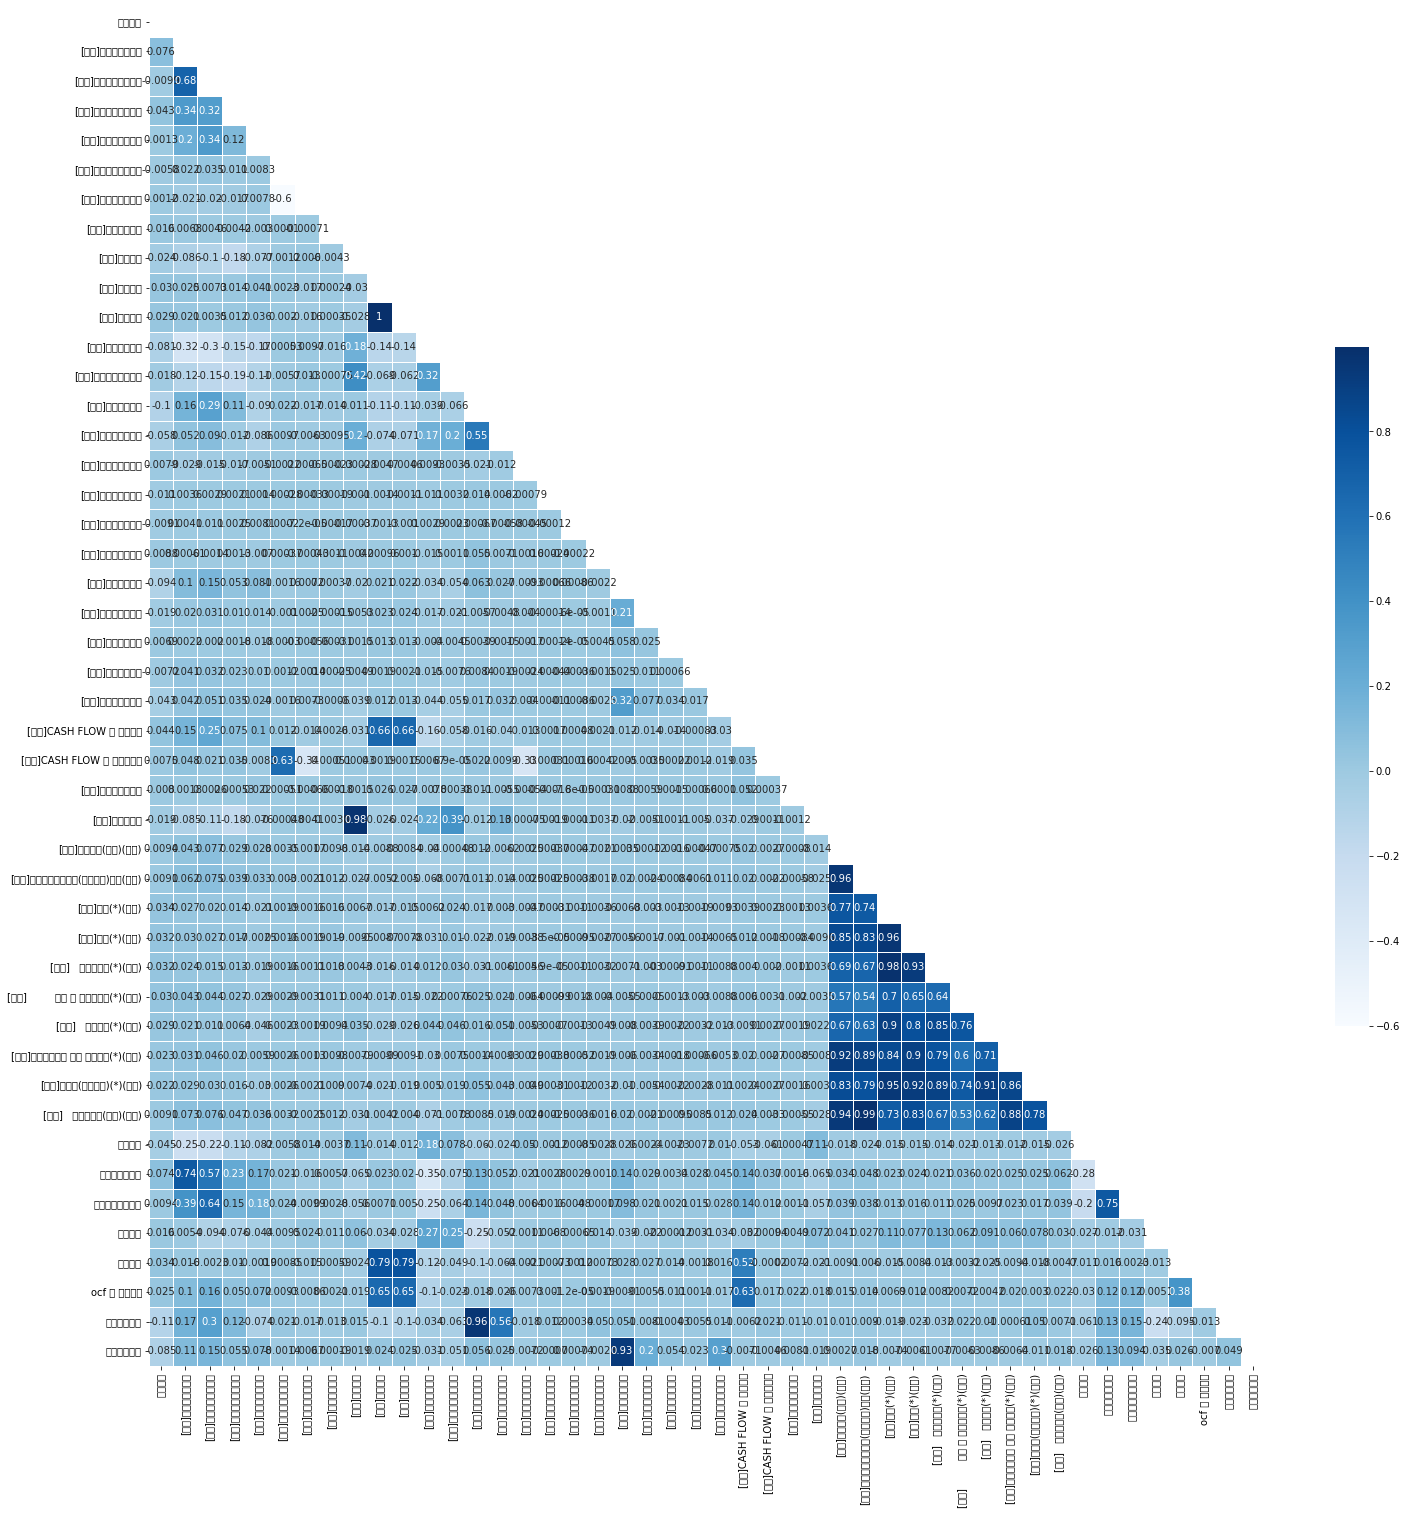

In [ ]:
data.drop(['감사의견코드', '업종코드', '소속코드'], axis=1, inplace=True)
plt.figure(figsize=(25,25))
df = data.iloc[:,3:].corr()

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df,
            cbar=True,
            annot=True,
            mask=mask, 
            linewidths=0.5,
            cbar_kws={"shrink":.5},
            cmap='Blues')
data.iloc[:,3:].corr()

In [ ]:
# 칼럼명 변경
data.rename(columns={'[제조]총자본순이익률':'총자본순이익률',
                     '[제조]총자본영업이익률':'총자본영업이익률',
                     '[제조]자기자본순이익률':'자기자본순이익률',
                     '[제조]매출액총이익률':'매출액총이익률',
                     '[제조]매출액영업이익률':'매출액영업이익률',
                     '[제조]금융비용부담률':'금융비용부담률',
                     '[제조]자기자본비율':'자기자본비율',
                     '[제조]부채비율':'부채비율',
                     '[제조]유동비율':'유동비율',
                     '[제조]당좌비율':'당좌비율',
                     '[제조]차입금의존도':'차입금의존도',
                     '[제조]비유동장기적합률':'비유동장기적합률',
                     '[제조]총자본회전률':'총자본회전률',
                     '[제조]자기자본회전률':'자기자본회전률',
                     '[제조]운전자본회전률':'운전자본회전률',
                     '[제조]매출채권회전률':'매출채권회전률',
                     '[제조]재고자산회전률':'재고자산회전률',
                     '[제조]매입채무회전률':'매입채무회전률',
                     '[제조]총자본증가율':'총자본증가율',
                     '[제조]유동자산증가율':'유동자산증가율',
                     '[제조]매출액증가율':'매출액증가율',
                     '[제조]순이익증가율':'순이익증가율',
                     '[제조]자기자본증가율':'자기자본증가율',
                     '[제조]CASH FLOW 대 부채비율':'CASH FLOW 대 부채비율',
                     '[제조]CASH FLOW 대 매출액비율':'CASH FLOW 대 매출액비율',
                     '[제조]유형자산증가율':'유형자산증가율',
                     '[제조]차입금비율':'차입금비율',
                     '[제조]영업이익(손실)(천원)':'영업이익(손실)(천원)',
                     '[제조]법인세비용차감전(계속사업)손익(천원)':'법인세비용차감전(계속사업)손익(천원)',
                     '[제조]자산(*)(천원)':'자산(*)(천원)',
                     '[제조]자본(*)(천원)':'자본(*)(천원)',
                     '[제조]   비유동자산(*)(천원)':'비유동자산(*)(천원)',
                     '[제조]   유동부채(*)(천원)':'유동부채(*)(천원)',
                     '[제조]영업활동으로 인한 현금흐름(*)(천원)':'영업활동으로 인한 현금흐름(*)(천원)',
                     '[제조]매출액(영업수익)(*)(천원)':'매출액(영업수익)(*)(천원)',
                     '[제조]   당기순이익(손실)(천원)':'당기순이익(손실)(천원)',
                     '[제조]         현금 및 현금성자산(*)(천원)':'현금 및 현금성자산(*)(천원)'}, inplace=True)

In [ ]:
data.to_csv("전처리완료3.csv")